In [4]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import os # accessing directory structure
from sklearn.metrics import mean_squared_error

from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.datasets import data
import seaborn as sns

In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
from sklearn.metrics import r2_score

In [13]:
#Dummy users imput random generated between min max of various attributes
# att_electric = random.uniform(0, 100)
# att_ndiseases = random.uniform(16, 96)
# att_healthexp = random.uniform(1, 24)
# att_diabetes = random.uniform(0, 100)
# att_eduexp = random.uniform(0, 16)

# att_hospbeds = random.uniform(0, 16)
# att_hepB3 = random.uniform(0, 99)
# att_measles = random.uniform(0, 99)
# att_inflation = random.uniform(18, 513)

# att_cellular = random.uniform(0, 345)
# att_traffic = random.uniform(0, 65)
# att_sanitation = random.uniform(0, 100)

# att_infant= random.uniform(1000, 2000000) 
# att_population= random.uniform(0, 100)
# att_below_income = random.uniform(1, 31)
# att_interest_rate = random.uniform(-74, 94)
# att_suicide = random.uniform(0, 93)
# att_alcohol = random.uniform(0, 20)
# att_unemployment = random.uniform(0, 36)
# att_regn = random.uniform(1, 7)

In [14]:
#Dummy users imput value between min max of various attributes
att_electric = 100
att_ndiseases = 16
att_healthexp = 124
att_diabetes = 0
att_eduexp = 16

att_hospbeds = 16
att_hepB3 = 99
att_measles = 99
att_inflation = 18
att_cellular = 345
att_traffic = 0
att_sanitation = 0

att_infant= 1
att_population= 10000000
att_below_income = 0
att_interest_rate = -74
att_suicide = 1
att_alcohol = 1
att_unemployment = 1
att_regn = 3

In [15]:
#import dataset
data = pd.read_csv('ML_data_SL.csv')
  

#fix column names
    #fix column names
data.columns = (["countryname","countrycode","year","region","life_expectancy","access_electricity",
    "non_communicable_diseases","health_expenditure","diabetes","education_expenditure","hospital_beds",
    "hepb3","measles","inflation", "cellular_subscriptions", "road_mortality" ,"sanitation","infant_deaths","population",
    "below_median_income","interest_rate","suicide_rate","alcohol_consumption","unemployment"])


In [16]:
#Fix data types
data.countryname = data.countryname.astype('category')
data.countrycode = data.countrycode.astype('category')
data.year = data.year.astype('category')
data.region = data.region.astype('category')
data.life_expectancy = data.life_expectancy.astype(int)
data.access_electricity = data.access_electricity.astype(int)
data.non_communicable_diseases = data.non_communicable_diseases.astype(int)
data.health_expenditure = data.health_expenditure.astype(float)
data.diabetes = data.diabetes.astype(float)
data.education_expenditure = data.education_expenditure.astype(float)
data.hospital_beds = data.hospital_beds.astype(float)
data.hepb3 = data.hepb3.astype(int)
data.measles = data.measles.astype(int)
data.inflation = data.inflation.astype(int)
data.cellular_subscriptions = data.cellular_subscriptions.astype(int)
data.road_mortality = data.road_mortality.astype(float)
data.sanitation = data.sanitation.astype(float)
data.infant_deaths = data.infant_deaths.astype(int)
data.population = data.population.astype(int)
data.below_median_income = data.below_median_income.astype(float)
data.interest_rate = data.interest_rate.astype(float)
data.suicide_rate = data.suicide_rate.astype(float)
data.alcohol_consumption = data.alcohol_consumption.astype(float)
data.unemployment = data.unemployment.astype(float)

In [17]:
#Define user imput for Model
user_input = np.array([att_electric,
att_ndiseases, 
att_healthexp, 
att_diabetes, 
att_eduexp,
att_hospbeds, 
att_hepB3, 
att_measles, 
att_inflation,
att_cellular, 
att_traffic, 
att_sanitation, 
att_infant,  
att_population, 
att_below_income, 
att_interest_rate, 
att_suicide, 
att_alcohol, 
att_unemployment,
att_regn
]).reshape(1,-1)

In [18]:
user_input = pd.DataFrame(user_input)

In [19]:
data.dtypes

countryname                  category
countrycode                  category
year                         category
region                       category
life_expectancy                 int32
access_electricity              int32
non_communicable_diseases       int32
health_expenditure            float64
diabetes                      float64
education_expenditure         float64
hospital_beds                 float64
hepb3                           int32
measles                         int32
inflation                       int32
cellular_subscriptions          int32
road_mortality                float64
sanitation                    float64
infant_deaths                   int32
population                      int32
below_median_income           float64
interest_rate                 float64
suicide_rate                  float64
alcohol_consumption           float64
unemployment                  float64
dtype: object

In [20]:
#Data Split
y = data['life_expectancy']
X = data.drop(['life_expectancy','countryname','countrycode', 'year'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)    

In [21]:
#model training
gbm_opt = GradientBoostingRegressor(learning_rate=0.01, n_estimators=500,
                                        max_depth=5, min_samples_split=10, 
                                        min_samples_leaf=1, subsample=0.7,
                                        max_features= 18, random_state=101, criterion='friedman_mse')
gbm_opt.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, max_features=18,
                          min_samples_split=10, n_estimators=500,
                          random_state=101, subsample=0.7)

In [22]:
#making a prediction
gbm_predictions = gbm_opt.predict(user_input) #user_input is taken from input attributes 
gbm_score = gbm_opt.score(X_test,y_test) #R2 of the prediction from user input
gbm_mse = mean_squared_error(y_test, gbm_opt.predict(X_test))
gbm_rmse = gbm_mse**(1/2)

gbm_mse_train = mean_squared_error(y_train, gbm_opt.predict(X_train))
gbm_rmse_train = gbm_mse_train**(1/2)

print('Based on the user input the estimated Life Expectancy for this region is: ', gbm_predictions)
print('With an R2 score of: ', gbm_score)
print("The root mean squared error (RMSE) on test set: {:.4f}".format(gbm_rmse))
print("The root mean squared error (RMSE) on train set: {:.4f}".format(gbm_rmse_train))

Based on the user input the estimated Life Expectancy for this region is:  [72.43558584]
With an R2 score of:  0.9685260520781328
The root mean squared error (RMSE) on test set: 1.7164
The root mean squared error (RMSE) on train set: 1.5175


In [46]:
#Building Correlation Matrix Model for data
nRowsRead = None # specify 'None' if want to read whole file
# Life Expectancy Data.csv has 2939 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('ML_data_SL.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'ML_data_SL.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')
df1.head(5)

There are 4557 rows and 24 columns


,CountryName,CountryCode,Year,Region,"Life expectancy at birth, total (years)",Access to electricity (% of population),"Cause of death, by non-communicable diseases (% of total)",Current health expenditure (% of GDP),Diabetes prevalence (% of population ages 20 to 79),"Government expenditure on education, total (% of GDP)",...,Mobile cellular subscriptions (per 100 people),"Mortality caused by road traffic injury (per 100,000 population)","Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)",Number of infant deaths,"Population, total",Proportion of people living below 50 percent of median income (%),Real interest rate (%),"Suicide mortality rate (per 100,000 population)","Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,AFG,1999,6,55.376,97.7,50.000000,9.400000,9.2,4.1,...,0.000000,16.0,13.9,89438,20170847.0,12.8,12.1,4.1,0.2,11.69
1,Afghanistan,AFG,2000,6,55.841,97.7,32.009763,9.400000,9.2,4.1,...,0.000000,14.7,13.9,89703,20779957.0,12.8,12.1,4.9,0.2,11.65
2,Afghanistan,AFG,2001,6,56.308,97.7,50.000000,9.400000,9.2,4.1,...,0.000000,15.1,13.9,89479,21606992.0,12.8,12.1,5.0,0.2,11.63
3,Afghanistan,AFG,2002,6,56.784,97.7,50.000000,9.443390,9.2,4.1,...,0.110616,14.9,13.9,88842,22600774.0,12.8,12.1,5.0,0.2,11.68
4,Afghanistan,AFG,2003,6,57.271,97.7,50.000000,8.941258,9.2,4.1,...,0.844564,15.0,13.9,87916,23680871.0,12.8,12.1,5.0,0.2,11.68


In [47]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for Life Expectancy')
    plt.show()

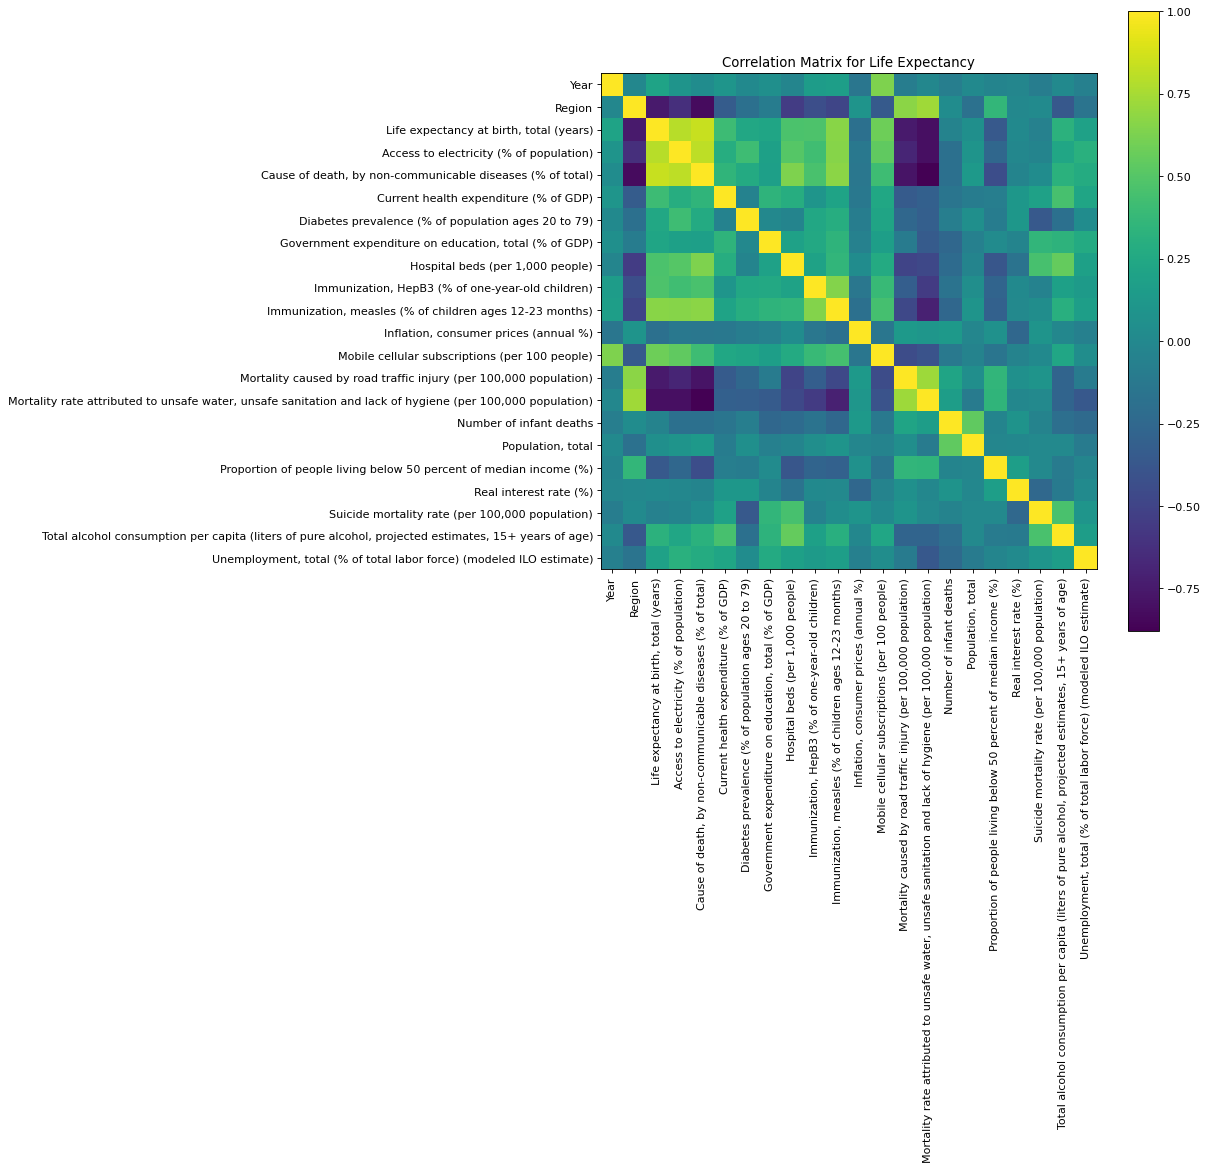

In [25]:
plotCorrelationMatrix(df1, 10)

In [26]:
#new test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13)

params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [27]:
#getting new MSE
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 4.5685


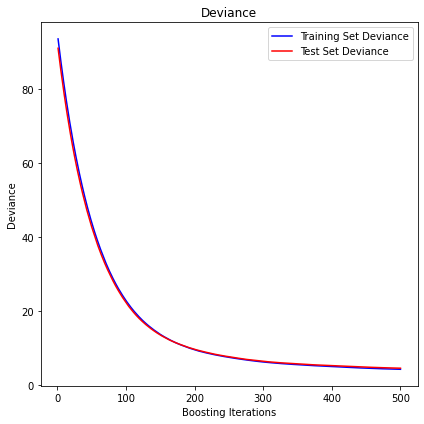

In [28]:
# Plotting Deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

In [29]:
feature_names = X.columns
feature_names

Index(['region', 'access_electricity', 'non_communicable_diseases',
       'health_expenditure', 'diabetes', 'education_expenditure',
       'hospital_beds', 'hepb3', 'measles', 'inflation',
       'cellular_subscriptions', 'road_mortality', 'sanitation',
       'infant_deaths', 'population', 'below_median_income', 'interest_rate',
       'suicide_rate', 'alcohol_consumption', 'unemployment'],
      dtype='object')

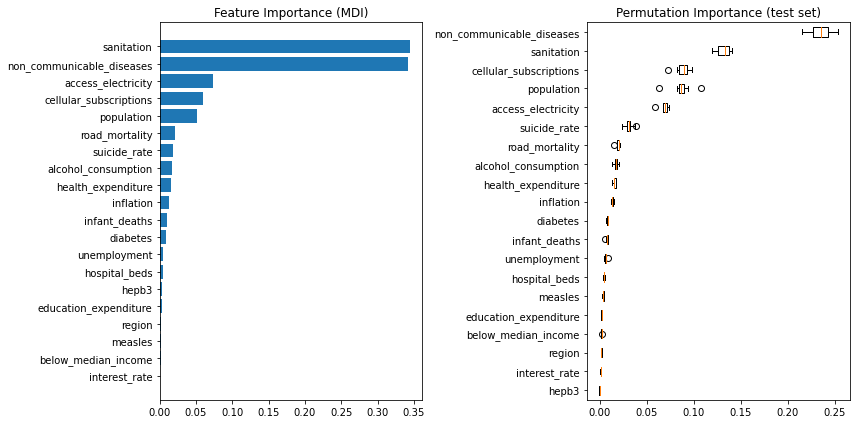

In [30]:
# Plotting Features of importance
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(reg, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=feature_names[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [6]:
# Data import from AWS
dataAWS = pd.read_csv('https://renzo-test1.s3.amazonaws.com/life_expectancy/ML_data_SL.csv')
dataAWS

,CountryName,CountryCode,Year,Region,"Life expectancy at birth, total (years)",Access to electricity (% of population),"Cause of death, by non-communicable diseases (% of total)",Current health expenditure (% of GDP),Diabetes prevalence (% of population ages 20 to 79),"Government expenditure on education, total (% of GDP)",...,Mobile cellular subscriptions (per 100 people),"Mortality caused by road traffic injury (per 100,000 population)","Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)",Number of infant deaths,"Population, total",Proportion of people living below 50 percent of median income (%),Real interest rate (%),"Suicide mortality rate (per 100,000 population)","Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,AFG,1999,South Asia,55.376,97.700000,50.000000,9.400000,9.2,4.10000,...,0.000000,16.0,13.9,89438,20170847.0,12.8,12.100000,4.1,0.20,11.69
1,Afghanistan,AFG,2000,South Asia,55.841,97.700000,32.009763,9.400000,9.2,4.10000,...,0.000000,14.7,13.9,89703,20779957.0,12.8,12.100000,4.9,0.20,11.65
2,Afghanistan,AFG,2001,South Asia,56.308,97.700000,50.000000,9.400000,9.2,4.10000,...,0.000000,15.1,13.9,89479,21606992.0,12.8,12.100000,5.0,0.20,11.63
3,Afghanistan,AFG,2002,South Asia,56.784,97.700000,50.000000,9.443390,9.2,4.10000,...,0.110616,14.9,13.9,88842,22600774.0,12.8,12.100000,5.0,0.20,11.68
4,Afghanistan,AFG,2003,South Asia,57.271,97.700000,50.000000,8.941258,9.2,4.10000,...,0.844564,15.0,13.9,87916,23680871.0,12.8,12.100000,5.0,0.20,11.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4552,Zimbabwe,ZWE,2015,Sub-Saharan Africa,59.534,33.700000,36.946549,7.452066,1.8,5.90000,...,92.347105,38.7,24.6,20014,13814642.0,12.7,7.886025,18.0,4.92,5.29
4553,Zimbabwe,ZWE,2016,Sub-Saharan Africa,60.294,39.676228,39.000000,7.647620,1.8,5.90000,...,91.793458,39.9,24.6,19029,14030338.0,12.7,4.847585,16.8,4.70,5.24
4554,Zimbabwe,ZWE,2017,Sub-Saharan Africa,60.812,40.144283,39.000000,5.849775,1.8,5.81878,...,98.985073,40.1,24.6,18293,14236599.0,12.7,-3.490553,15.0,4.70,5.15
4555,Zimbabwe,ZWE,2018,Sub-Saharan Africa,61.195,40.616360,39.000000,4.734331,1.8,5.87135,...,89.404869,40.6,24.6,17413,14438812.0,12.7,-33.586875,14.0,4.67,5.07


## Testing using different ML Models

In [31]:
# Machine Learning Model RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=8, n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rfr.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('life_expectancy mean:', np.round(np.mean(y), 2))  
print('life_expectancy std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, rfr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, rfr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, rfr.predict(X_test), multioutput='variance_weighted'), 2))

life_expectancy mean: 70.5
life_expectancy std: 9.74
RMSE: 1.93
R2 score train: 0.97
R2 score test: 0.96


In [39]:
# Using DecisionTreeRegressor Model 3
model3=DecisionTreeRegressor().fit(X_train,y_train)
# Using RandomForestRegressor Model 4
model4=RandomForestRegressor().fit(X_train,y_train)

In [40]:
model3_predict=model3.predict(X_train)
model4_predict=model4.predict(X_train)

C:\Users\arron\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='life_expectancy'>

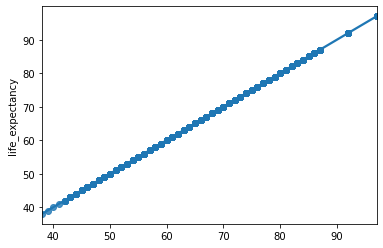

In [42]:
sns.regplot(model3_predict,y_train)

C:\Users\arron\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='life_expectancy'>

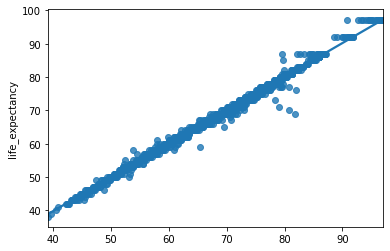

In [43]:
sns.regplot(model4_predict,y_train)

In [49]:
#Testing
model3_test=np.exp(model3.predict(X_test))
model4_test=np.exp(model4.predict(X_test))

C:\Users\arron\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='life_expectancy'>

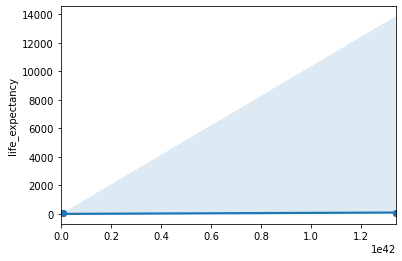

In [53]:
sns.regplot(model3_test,y_test)

C:\Users\arron\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='life_expectancy'>

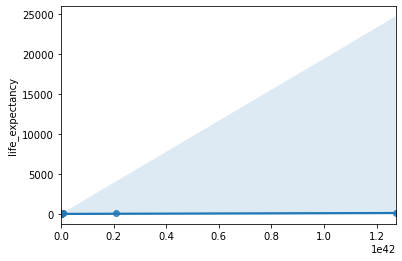

In [55]:
sns.regplot(model4_test,y_test)

In [50]:
#Scoring
model3_r2=r2_score(model3_test,y_test)
model4_r2=r2_score(model4_test,y_test)

In [51]:
print("nmodel3_error:{}\nmodel4_error:{}".format(model3_r2,model4_r2))

nmodel3_error:-0.006713416139579653
model4_error:-0.0029615709517625266


In [60]:
y = data['life_expectancy']
X = data.drop(['life_expectancy','countryname','countrycode', 'year'], axis=1)

dtr = DecisionTreeRegressor()
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3)
dtr.fit(train_X, train_y)
pred = dtr.predict(test_X)
r2_score(test_y, pred)

0.9502624881528117